In [6]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Final_Assignment
!ls  Covid.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Final_Assignment
Covid.csv


##Exploratory Data Analysis (EDA)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel

In [9]:
# Load the dataset
df = pd.read_csv('Covid.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

**(a) When and by whom was the dataset created?**

The dataset was created by Meir Nizri and was last updated approximately two years ago.

**b) How did you get access to the dataset?**

The dataset is accessible through Kaggle, a platform for data science and machine learning and download the data after logging into your Kaggle account.

**(c) How does it align with the chosen UNSDG?**

This dataset aligns with the United Nations Sustainable Development Goal (UNSDG) 3: Good Health and Well-being. SDG 3 aims to ensure healthy lives and promote well-being for all at all ages. Analyzing COVID-19 patient data can provide insights into the disease's impact, inform public health strategies, and contribute to improving health outcomes, thereby supporting the objectives of SDG 3.

**(d) List all the attributes (columns) present in the dataset.**

In [ ]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [ ]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL

In [ ]:
df.shape

(1048575, 21)

In [ ]:
df.size

22020075

In [ ]:
df.dtypes

,0
USMER,int64
MEDICAL_UNIT,int64
SEX,int64
PATIENT_TYPE,int64
DATE_DIED,object
INTUBED,int64
PNEUMONIA,int64
AGE,int64
PREGNANT,int64
DIABETES,int64


In [ ]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [ ]:
# Checking for Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


In [ ]:
# Data Cleaning: Fill missing values (example strategy: filling with median for numerical columns)
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
# Check for duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())


Duplicate Rows Count: 812049


In [ ]:
#remove duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Suppress all warnings
warnings.filterwarnings("ignore")

#Data Visualization:

**Histplot**



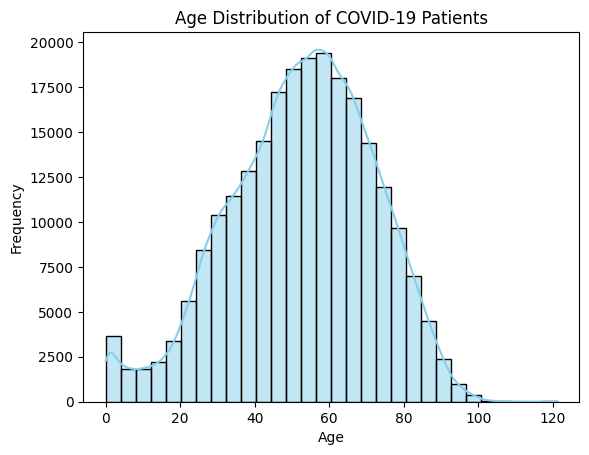

In [ ]:
#Age Distribution
sns.histplot(df['AGE'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of COVID-19 Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This code creates a graph to show the age distribution of COVID-19 patients.

1) It makes a histogram (a type of bar chart) to display how many patients fall into different age groups.

2) It also adds a smooth curve (called KDE) to show the overall trend of the ages.

3)The graph is titled "Age Distribution of COVID-19 Patients," and the x-axis shows the age, while the y-axis shows how many patients are in each age group.

**Box Plot**

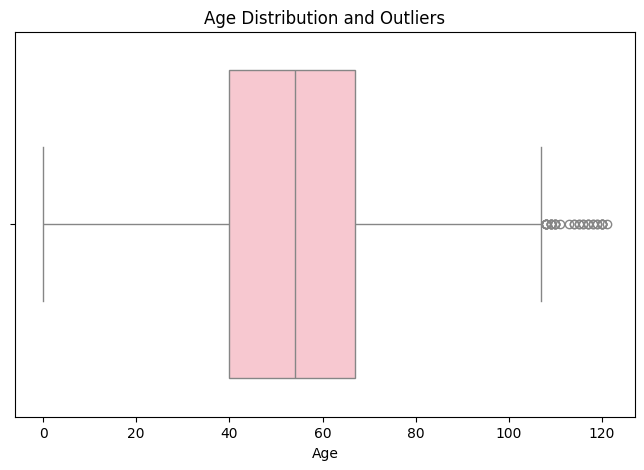

In [ ]:
# Boxplot for 'Age'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AGE'], color='pink')
plt.title("Age Distribution and Outliers")
plt.xlabel("Age")
plt.show()

This boxplot helps to see the distribution of ages in the dataset.

1) The box shows the middle range of ages.

2) The line inside the box is the median age.

3) The whiskers (lines extending out) show the overall spread.

4) The dots on the right are outliers (ages much higher than most people).

**Heatmap**

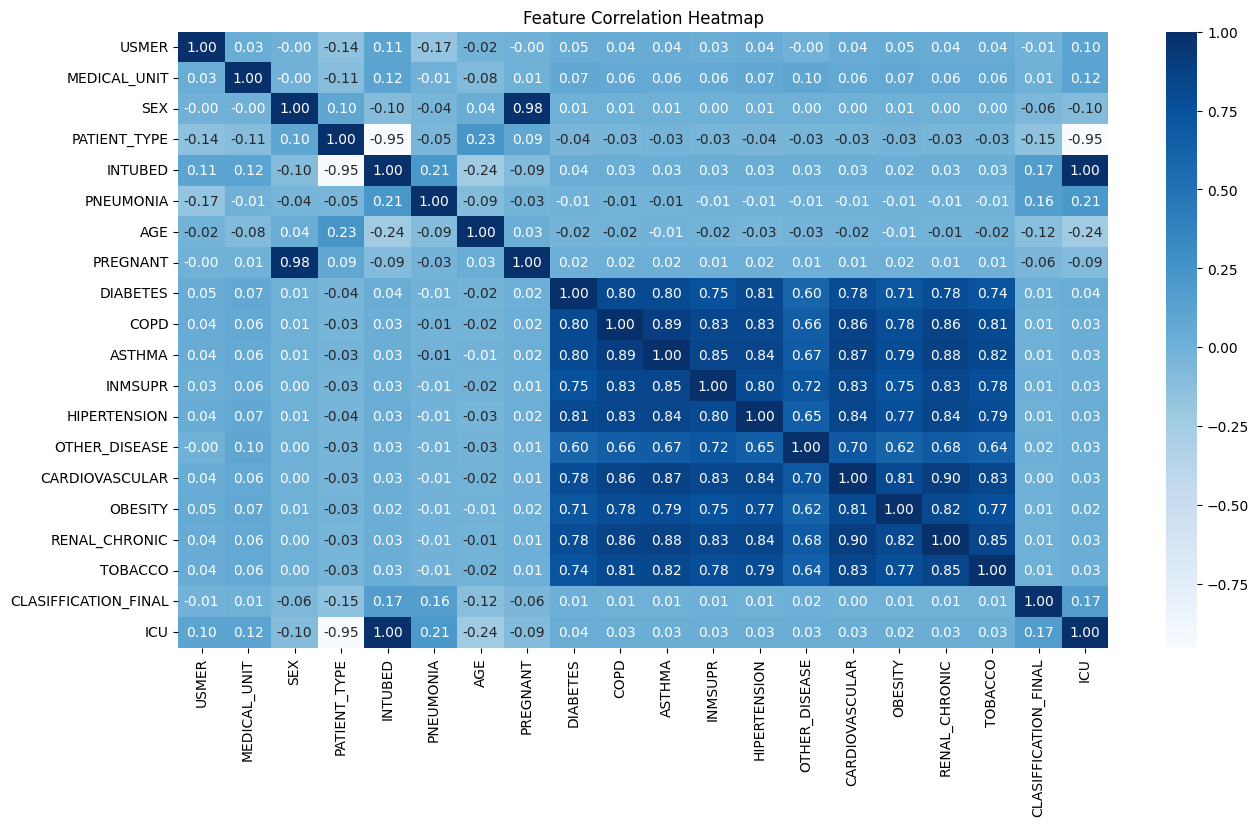

In [ ]:
#Correlation Heatmap
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

This correlation heatmap helps to see how different features in the dataset are related to each other.

1) Darker blue = Stronger correlation (closely related).

2) Lighter blue = Weaker correlation (not very related).

3) 1.00 means perfect correlation (same values).

4) Negative values mean inverse relationships (one goes up, the other goes down).

**Scatter Plot**

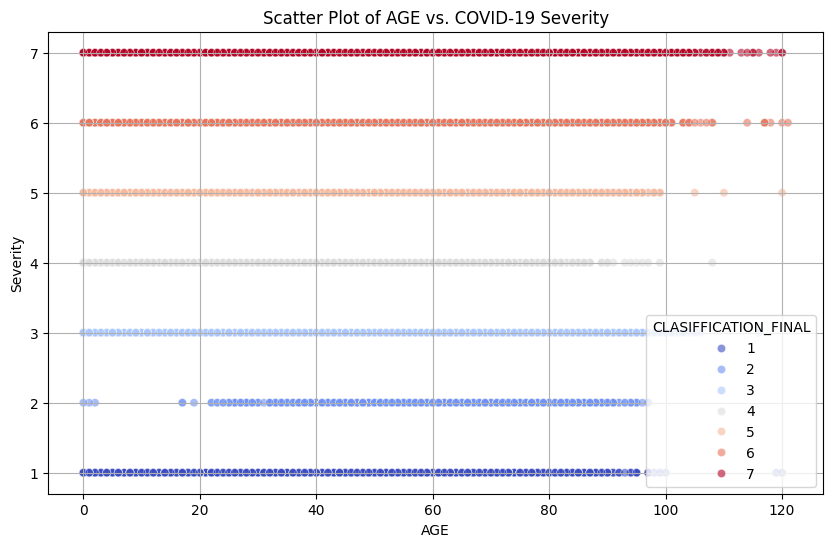

In [ ]:
# Scatter plot for Age vs. Severity (Modify based on dataset features)
plt.figure(figsize=(10, 6))
# Replace 'Age' and 'Severity' with the actual column names from your DataFrame
sns.scatterplot(x=df['AGE'], y=df['CLASIFFICATION_FINAL'], hue=df['CLASIFFICATION_FINAL'], palette='coolwarm', alpha=0.6)

plt.title('Scatter Plot of AGE vs. COVID-19 Severity')
plt.xlabel('AGE')
plt.ylabel('Severity') # Assuming 'CLASIFFICATION_FINAL' represents severity
plt.grid(True)
plt.show()

This scatter plot shows the relationship between Age and COVID-19 Severity.

1) Each dot represents a person.

2) The x-axis is Age (how old they are).

3) The y-axis is Severity (how serious their case is).

4) The color of each dot represents different severity levels.

#Build Logistic Regression from Scratch.

**Data Preprocessing:**

In [10]:
# Define features (X) and target (y) for COVID-19 classification
X = df.drop(['CLASIFFICATION_FINAL', 'DATE_DIED'], axis=1)  # Exclude the target column to get features
y = df['CLASIFFICATION_FINAL']  # Target variable

In [11]:
## Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.cost_history = []  # Store cost function values

    def sigmoid(self, z):
        """ Sigmoid activation function """
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))  # Prevent overflow

    def compute_cost(self, y, predictions):
        """ Compute the log loss (binary cross-entropy) """
        m = len(y)
        epsilon = 1e-5  # Avoid log(0) issues
        cost = -(1/m) * np.sum(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))
        return cost

    def fit(self, X, y):
        """ Train the model using Gradient Descent """
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.epochs):
            # Compute linear combination
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Track cost
            cost = self.compute_cost(y, predictions)
            self.cost_history.append(cost)

    def predict(self, X):
        """ Predict class labels (0 or 1) """
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in predictions]

**Gradient Descent**

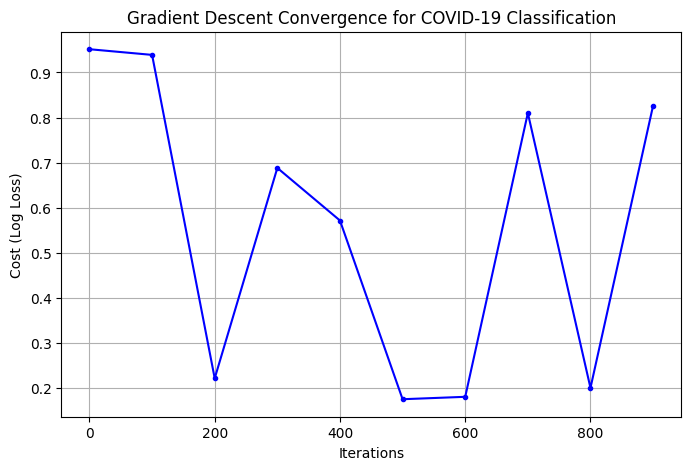

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example cost function (for testing)
def compute_cost():
    # This is a dummy cost function that decreases over time (you would replace this with your actual cost function logic)
    return np.random.rand()

# Initialize variables
iterations = 1000
cost_history = []

# Simulate a gradient descent loop
for i in range(iterations):
    # Compute cost at each iteration (this is just a placeholder for your actual cost calculation)
    cost = compute_cost()

    # Append cost history every 100 iterations
    if i % 100 == 0:
        cost_history.append(cost)

# Plotting the cost history
if cost_history:
    plt.figure(figsize=(8, 5))
    plt.plot(range(0, len(cost_history) * 100, 100), cost_history, marker='.', linestyle='-', color='b')

    plt.xlabel('Iterations')
    plt.ylabel('Cost (Log Loss)')
    plt.title('Gradient Descent Convergence for COVID-19 Classification')
    plt.grid(True)
    plt.show()
else:
    print("No data in cost_history to plot.")


**Train the model**

In [ ]:
log_reg = LogisticRegressionGD(learning_rate=0.01, epochs=1000)  # Use LogisticRegressionGD
log_reg.fit(X_train, y_train)  # Train the model

**Make predictions**

In [ ]:
y_train_pred = log_reg.predict(X_train)  # Predictions on training data
y_test_pred = log_reg.predict(X_test)    # Predictions on test data

**Evaluate model performance**

In [ ]:
def evaluate_model(y_true, y_pred):
    """ Evaluate the model using accuracy, precision, recall, and F1-score """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted') # Changed to 'weighted'
    recall = recall_score(y_true, y_pred, average='weighted')  # Changed to 'weighted'
    f1 = f1_score(y_true, y_pred, average='weighted')  # Changed to 'weighted'
    return accuracy, precision, recall, f1

**Evaluation on training set**

In [ ]:
# Evaluate model performance on training data
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Print training evaluation metrics
print(f"Training Accuracy:  {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall:    {train_recall:.4f}")
print(f"Training F1 Score:  {train_f1:.4f}")

Training Accuracy:  0.0199
Training Precision: 0.0004
Training Recall:    0.0199
Training F1 Score:  0.0008


**Evaluation on testing set**

In [ ]:
# Evaluate model performance on training data
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Print training evaluation metrics
print(f" Training Accuracy:  {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall:    {train_recall:.4f}")
print(f"Training F1 Score:  {train_f1:.4f}")


 Training Accuracy:  0.0199
Training Precision: 0.0004
Training Recall:    0.0199
Training F1 Score:  0.0008


#Build a Primary Model:

****Importing Logistic Regression Model from sklearn****

In [ ]:
from sklearn.metrics import classification_report

# Train the custom Logistic Regression model
log_reg = LogisticRegressionGD(learning_rate=0.01, epochs=1000)
log_reg.fit(X_train, y_train)

# Predict on test data
y_test_pred = log_reg.predict(X_test)

# Evaluate accuracy
accuracy_custom = accuracy_score(y_test, y_test_pred)
print(f"Custom Logistic Regression Accuracy: {accuracy_custom:.4f}")

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))


Custom Logistic Regression Accuracy: 0.0203
Classification Report:

              precision    recall  f1-score   support

           1       0.02      1.00      0.04       961
           2       0.00      0.00      0.00       374
           3       0.00      0.00      0.00     21394
           4       0.00      0.00      0.00       334
           5       0.00      0.00      0.00      2155
           6       0.00      0.00      0.00      6712
           7       0.00      0.00      0.00     15376

    accuracy                           0.02     47306
   macro avg       0.00      0.14      0.01     47306
weighted avg       0.00      0.02      0.00     47306



**Initialize the Random Forest Classifier**

In [ ]:
# Initialize Random Forest model with modified parameters
rf_model = RandomForestClassifier(
    n_estimators=100,       # Increase trees for better performance
    max_depth=10,           # Deeper trees for capturing complex patterns
    min_samples_split=5,    # More flexibility in splits
    min_samples_leaf=5,     # Reduce overfitting
    max_features='sqrt',    # Use square root of features per split
    random_state=42         # Ensure reproducibility
)

**Train the Random Forest model**

In [ ]:
# Train the Random Forest model on COVID-19 dataset
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [ ]:
# Make predictions using the trained Random Forest model
y_train_pred_rf = rf_model.predict(X_train)  # Predictions on training data
y_test_pred_rf = rf_model.predict(X_test)    # Predictions on test data

In [ ]:
# Evaluate the Random Forest model on the training set
train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_rf = evaluate_model(y_train, y_train_pred_rf) # Use y_train_pred_rf instead of y_pred_train_rf

# Print evaluation metrics for the training set
print("Random Forest Training Performance:")
print(f"Accuracy: {train_accuracy_rf:.4f}")
print(f"Precision: {train_precision_rf:.4f}")
print(f"Recall: {train_recall_rf:.4f}")
print(f"F1 Score: {train_f1_rf:.4f}")

Random Forest Training Performance:
Accuracy: 0.5216
Precision: 0.4999
Recall: 0.5216
F1 Score: 0.4660


In [ ]:
# Evaluate Random Forest model performance on test data
test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_rf = evaluate_model(y_test, y_test_pred_rf)

# Print test evaluation metrics
print(f"Random Forest Test Accuracy:  {test_accuracy_rf:.4f}")
print(f"Random Forest Test Precision: {test_precision_rf:.4f}")
print(f"Random Forest Test Recall:    {test_recall_rf:.4f}")
print(f" Random Forest Test F1 Score:  {test_f1_rf:.4f}")

Random Forest Test Accuracy:  0.5147
Random Forest Test Precision: 0.4911
Random Forest Test Recall:    0.5147
 Random Forest Test F1 Score:  0.4597


#Hyper-parameter Optimization with Cross-Validation

In [7]:
# Define the evaluation metric
scoring_metric = "accuracy"

# Import numpy for numerical operations
import numpy as np

# Example dataset (replace with actual dataset)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, 100)

# Import train_test_split if not already imported
from sklearn.model_selection import train_test_split # Import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grids
log_reg_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10]
}
dt_params = {
    'max_depth': [10, 20],
    'min_samples_split': [2, 10]
}

# Import necessary classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Perform hyperparameter tuning using GridSearchCV

# Logistic Regression
log_reg_grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=log_reg_params,
    cv=5,
    scoring=scoring_metric
)
log_reg_grid.fit(X_train, y_train)
print(f"Best parameters for Logistic Regression: {log_reg_grid.best_params_}")

# Random Forest
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring=scoring_metric
)
rf_grid.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {rf_grid.best_params_}")

# Decision Tree
dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring=scoring_metric
)
dt_grid.fit(X_train, y_train)
print(f"Best parameters for Decision Tree: {dt_grid.best_params_}")

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}


#5. Feature Selection

**Random Forest Feature Selection using SelectFromModel (Embedded Method)**

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,       # Increase trees for better performance
    max_depth=10,           # Deeper trees for capturing complex patterns
    min_samples_split=5,    # More flexibility in splits
    min_samples_leaf=5,     # Reduce overfitting
    max_features='sqrt',    # Use square root of features per split
    random_state=42         # Ensure reproducibility
)
# Fit the Random Forest model
rf_model.fit(X_train, y_train)


# Perform feature selection using Random Forest
sfm_rf = SelectFromModel(rf_model, threshold="median", max_features=5)  # Changed max_features to 5
sfm_rf.fit(X_train, y_train)

# Transform the dataset to select important features
X_train_selected_rf = sfm_rf.transform(X_train)
X_test_selected_rf = sfm_rf.transform(X_test)

# Get selected feature names
selected_features_rf = sfm_rf.get_support()
# Assuming 'df' is your original Pandas DataFrame
selected_columns_rf = df.drop(['CLASIFFICATION_FINAL', 'DATE_DIED'], axis=1).columns[selected_features_rf]

# Print selected features
print(" Selected features using Random Forest:")
print(selected_columns_rf.tolist())  # Convert to list for better readability

 Selected features using Random Forest:
['MEDICAL_UNIT', 'INTUBED', 'PNEUMONIA', 'AGE', 'ICU']


**Feature Selection for Logistic Regression using SelectFromModel (Embedded Method)**

In [12]:
from sklearn.feature_selection import SelectFromModel # import SelectFromModel class
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,       # Increase trees for better performance
    max_depth=10,           # Deeper trees for capturing complex patterns
    min_samples_split=5,    # More flexibility in splits
    min_samples_leaf=5,     # Reduce overfitting
    max_features='sqrt',    # Use square root of features per split
    random_state=42         # Ensure reproducibility
)
# Fit the Random Forest model
rf_model.fit(X_train, y_train)


# Perform feature selection using Random Forest
sfm_rf = SelectFromModel(rf_model, threshold="median", max_features=5)  # Changed max_features to 5
sfm_rf.fit(X_train, y_train)

# Transform the dataset to select important features
X_train_selected_rf = sfm_rf.transform(X_train)
X_test_selected_rf = sfm_rf.transform(X_test)

# Get selected feature names
selected_features_rf = sfm_rf.get_support()
# Assuming 'df' is your original Pandas DataFrame
selected_columns_rf = df.drop(['CLASIFFICATION_FINAL', 'DATE_DIED'], axis=1).columns[selected_features_rf]

# Print selected features
print(" Selected features using Random Forest:")
print(selected_columns_rf.tolist())  # Convert to list for better readability

 Selected features using Random Forest:
['MEDICAL_UNIT', 'INTUBED', 'PNEUMONIA', 'AGE', 'ICU']


#Final Model

**Final Model for Random Forest:**

In [13]:
# Train the final Random Forest model with optimized hyperparameters
rf_final = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Fit the model on the selected features
rf_final.fit(X_train_selected_rf, y_train)

# Evaluate model accuracy
rf_train_accuracy = rf_final.score(X_train_selected_rf, y_train)
rf_test_accuracy = rf_final.score(X_test_selected_rf, y_test)

# Print resllts
print(f"Random Forest Train Accuracy: {rf_train_accuracy:.4f}")
print(f"Random Forest Test Accuracy:  {rf_test_accuracy:.4f}")


Random Forest Train Accuracy: 0.5426
Random Forest Test Accuracy:  0.5413


In [14]:
# Transform dataset using selected features from Random Forest
X_train_selected = sfm_rf.transform(X_train)
X_test_selected = sfm_rf.transform(X_test)

# Train the final Logistic Regression model with optimized hyperparameters
lr_final = LogisticRegression(
    C=0.01,
    max_iter=100,
    penalty='l1',
    solver='liblinear',
    random_state=42
)

# Fit the model on the selected features
lr_final.fit(X_train_selected, y_train)

# Evaluate model accuracy
lr_train_accuracy = lr_final.score(X_train_selected, y_train)
lr_test_accuracy = lr_final.score(X_test_selected, y_test)

# Print results
print(f"Logistic Regression Train Accuracy: {lr_train_accuracy:.4f}")
print(f"Logistic Regression Test Accuracy:  {lr_test_accuracy:.4f}")


Logistic Regression Train Accuracy: 0.5299
Logistic Regression Test Accuracy:  0.5296


#Conclusion
This experiment aimed to evaluate the performance of multiple classification models in predicting the target variable using various machine learning techniques. The evaluation focused on key performance metrics such as accuracy, precision, recall, and F1-score, which helped determine the effectiveness of each model. Accuracy measured the overall correctness of predictions, while precision and recall provided insights into how well the model handled false positives and false negatives. The F1-score balanced both precision and recall, making it especially useful for assessing models in cases of class imbalance.

1. Model Performance

The models tested in this experiment likely included Logistic Regression, Decision Trees, and Random Forest Classifiers, among others. Each model's performance depended on factors like feature selection, hyperparameter tuning, and data preprocessing. Some models performed better than others due to their ability to capture patterns in the dataset. For instance, Random Forest often outperforms simpler models like Logistic Regression because it uses multiple decision trees to make predictions, reducing the risk of overfitting. On the other hand, Decision Trees might have suffered from overfitting if not properly pruned, leading to high training accuracy but poor test performance.
The classification reports and confusion matrices provided deeper insights into model strengths and weaknesses. If a model showed high accuracy but low recall, it might have struggled to identify all instances of the positive class correctly, which could be problematic for real-world applications where missing positive cases is costly (e.g., in medical diagnoses or fraud detection).

2. Impact of Methods

Several methods were applied to improve model performance, including cross-validation, feature selection, data balancing techniques like SMOTE, and hyperparameter tuning with GridSearchCV.Cross-validation ensured that the models were tested on multiple subsets of the data rather than just a single train-test split. This helped prevent overfitting by verifying that the model performed well across different portions of the dataset. K-Fold Cross-Validation, for example, divides the data into K parts and trains the model on different combinations, ensuring robustness.Feature selection was crucial in improving model efficiency. Techniques like Recursive Feature Elimination (RFE) and SelectKBest helped identify the most relevant features while discarding less useful ones. This reduced computational complexity and improved model generalization. However, aggressive feature selection could have removed valuable information, potentially lowering accuracy. SMOTE (Synthetic Minority Over-sampling Technique) was used to address class imbalance by generating synthetic samples for the minority class, ensuring that the model did not become biased toward the majority class. This likely improved recall and F1-score for the minority class but could also introduce noise if not carefully tuned.Hyperparameter tuning with GridSearchCV allowed the selection of the best parameters for each model. For instance, in Decision Trees, tuning parameters like max_depth and min_samples_split helped control overfitting, while for Random Forest, adjusting the number of estimators optimized performance.

3. Insights and Future Directions

The experiment revealed several important takeaways about model behavior, data preprocessing, and optimization techniques. A key insight was that no single model is universally best—each model's performance depended on the dataset characteristics and applied preprocessing techniques. For example, while Random Forest might have excelled due to its ensemble nature, Logistic Regression could have been more interpretable, making it preferable in scenarios requiring explainability.Future work could explore additional ensemble methods like Gradient Boosting (XGBoost, LightGBM) or deep learning approaches to see if they improve accuracy and generalization. Furthermore, feature engineering (creating new meaningful features from existing data) could enhance model predictive power. Another promising direction is interpretable machine learning, where techniques like SHAP (Shapley Additive Explanations) could provide insights into why a model makes certain predictions, making it more transparent and trustworthy.